# Case study - Cancer Detection

# Problem statement:
Using historical data about patients who were diagnosed with cancer, enable the doctors to confidently differentiate malignant 
cases from benign given the independent attributes.  
Prepare the data and create the model.

Data Set Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)


Relevant Papers:

Wolberg, W.H., & Mangasarian, O.L. (1990). Multisurface method of pattern separation for medical diagnosis applied to breast cytology. In Proceedings of the National Academy of Sciences, 87, 9193--9196.
[Web Link]

Zhang, J. (1992). Selecting typical instances in instance-based learning. In Proceedings of the Ninth International Machine Learning Conference (pp. 470--479). Aberdeen, Scotland: Morgan Kaufmann.
[Web Link]

# Dataset:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Importing Data file
data = pd.read_csv('bc2.csv')
dataset = pd.DataFrame(data)
dataset.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [22]:
dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [28]:
dataset.shape

(699, 11)

In [23]:
dataset['Class'].value_counts(normalize = True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [24]:
# Class: (2 for benign, 4 for malignant)
dataset['Class'] = dataset['Class'].map({2:0,4:1})

In [25]:
dataset['Class'].value_counts(normalize = True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [37]:
dataset.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [29]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [30]:
dataset['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [31]:
dataset = dataset.replace('?', np.nan)

In [32]:
dataset.isnull().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [17]:
# divide these missing values according to the target variable
# find out the median bare nuclei wrt 'bening and malignant'

In [33]:
dataset.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Missing value imputation with median of respective classes

In [ ]:
# median of bare nuclei belonging to class 0
# median of bare nuclei belonging to class 1

In [66]:
#from statistics import mean 
mode_0 = dataset[(dataset['Class'] == 0) & (dataset['Bare Nuclei'] != np.nan)]['Bare Nuclei'].mode().values[0]

mode_1 = dataset[(dataset['Class'] == 1) & (dataset['Bare Nuclei'] != np.nan)]['Bare Nuclei'].mode().values[0]

In [67]:
print(mode_0,mode_1)

1.0 10.0


In [65]:
mode_0

0    1.0
dtype: float64

In [68]:
dataset[(dataset['Class']==0) & (dataset['Bare Nuclei'].isnull() == True)]['Bare Nuclei'] = mode_0
dataset[(dataset['Class']==1) & (dataset['Bare Nuclei'].isnull() == True)]['Bare Nuclei'] = mode_1

In [73]:
#dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)
## converting the hp column from object 'Bare Nuclei'/ string type to float
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int64') 

In [74]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [75]:
dataset.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [76]:
dataset.shape

(699, 11)

In [77]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

#### Explore target variable

In [78]:
dataset['Class'].value_counts(normalize = True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

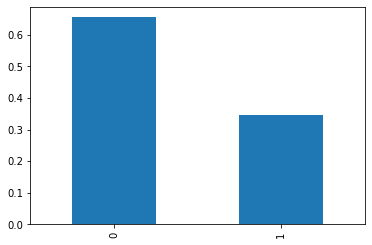

In [79]:
dataset['Class'].value_counts(normalize = True).plot(kind = 'bar')

#### Exploring independent columns

In [80]:
num_cols = dataset.dtypes[dataset.dtypes != 'object'].index.tolist()
obj_cols = dataset.dtypes[dataset.dtypes == 'object'].index.tolist()

In [81]:
import warnings

warnings.simplefilter("ignore", UserWarning)

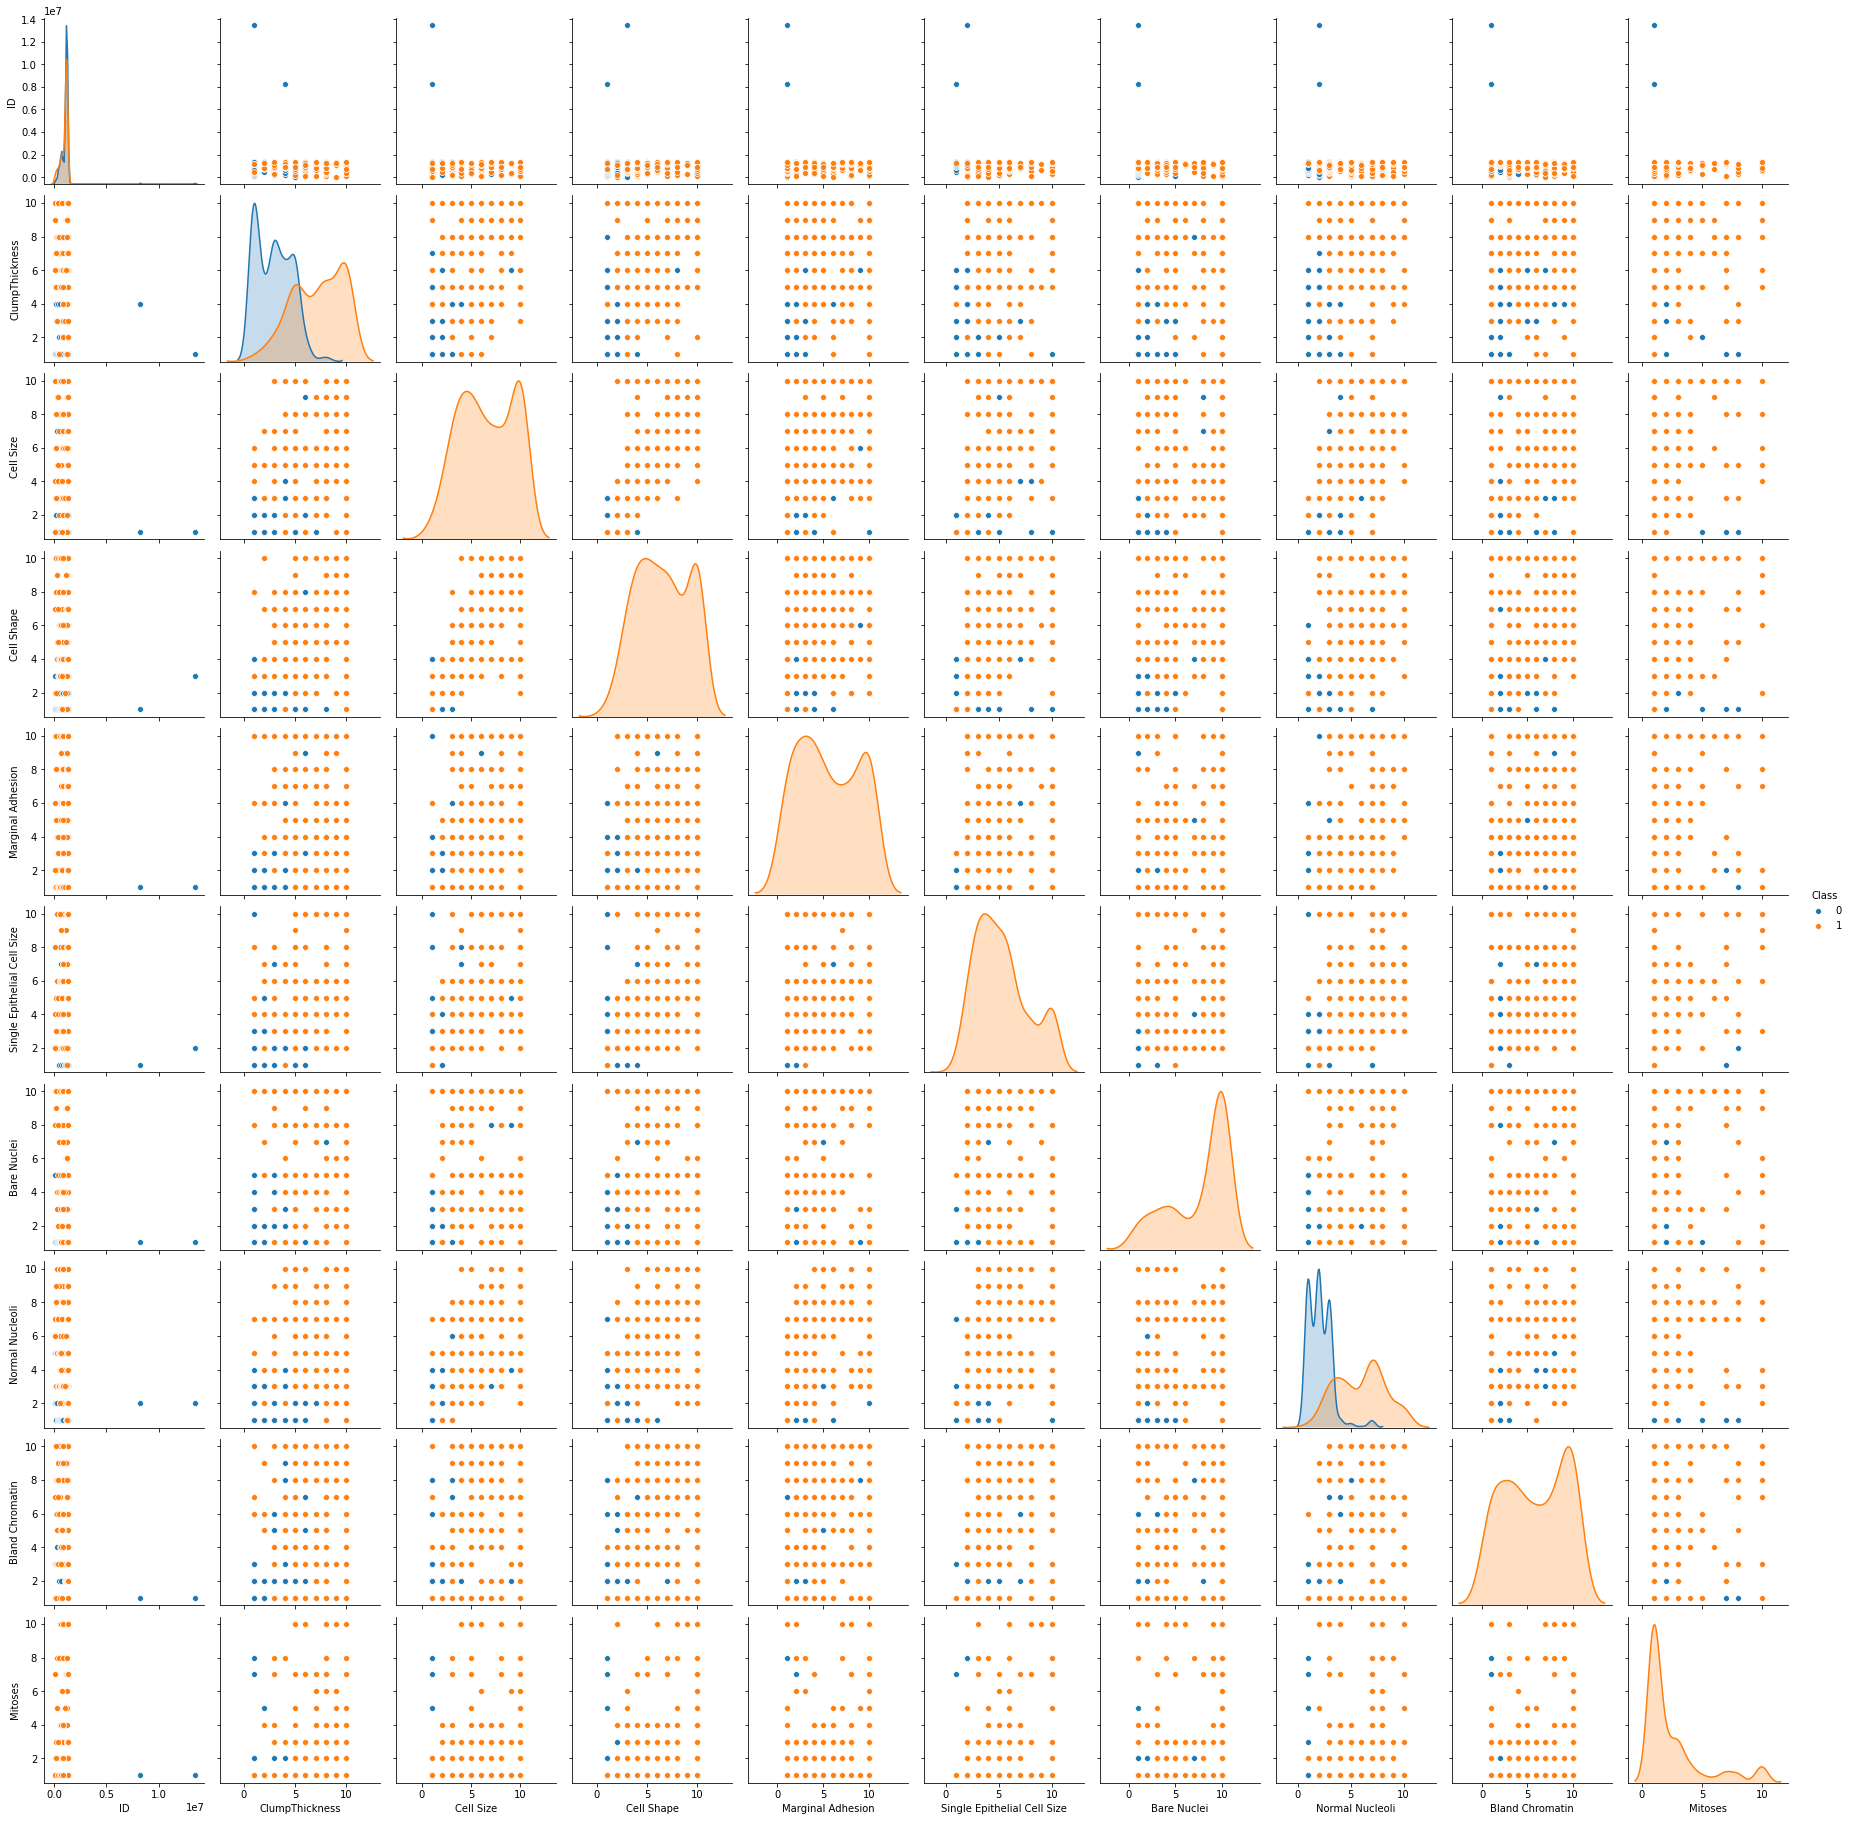

In [84]:
sns.pairplot(dataset, diag_kind = "kde", hue = "Class") # to visually understand 
plt.show()

In [101]:
dataset['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [102]:
dataset.shape[0]

699

In [ ]:
## From the plot, it is evident that all columns seem to categorical 

In [92]:
X = dataset.drop(['Class', 'ID'], axis = 1)
y = dataset['Class']

In [97]:
# Custom function for univariate visualization of Categorical Variables

def UVA_category(data, cat_cols):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    size = len(cat_cols)

    c = 3
    if len(cat_cols)%c == 0:
        r = len(cat_cols)/c
    else:
        r = int(len(cat_cols)/c)+1
        
    r = int(r)

    plt.rcParams["figure.figsize"] = [20, 20]
    plt.rcParams["figure.autolayout"] = True

    count = 1
#     plt.tight_layout()
    for i in range(len(cat_cols)):
        norm_count = data[cat_cols[i]].value_counts(normalize = True)
        n_uni = len(norm_count)
        
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 1)
#         sns.barplot(y = norm_count.values, x = norm_count.index)# , order = norm_count.index)
        sns.countplot(data[cat_cols[i]])

        plt.ylabel('proportion', fontsize = 15)
        plt.xlabel('{}'.format(cat_cols[i]), fontsize = 15)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,np.round(norm_count,2)))

        count += 1

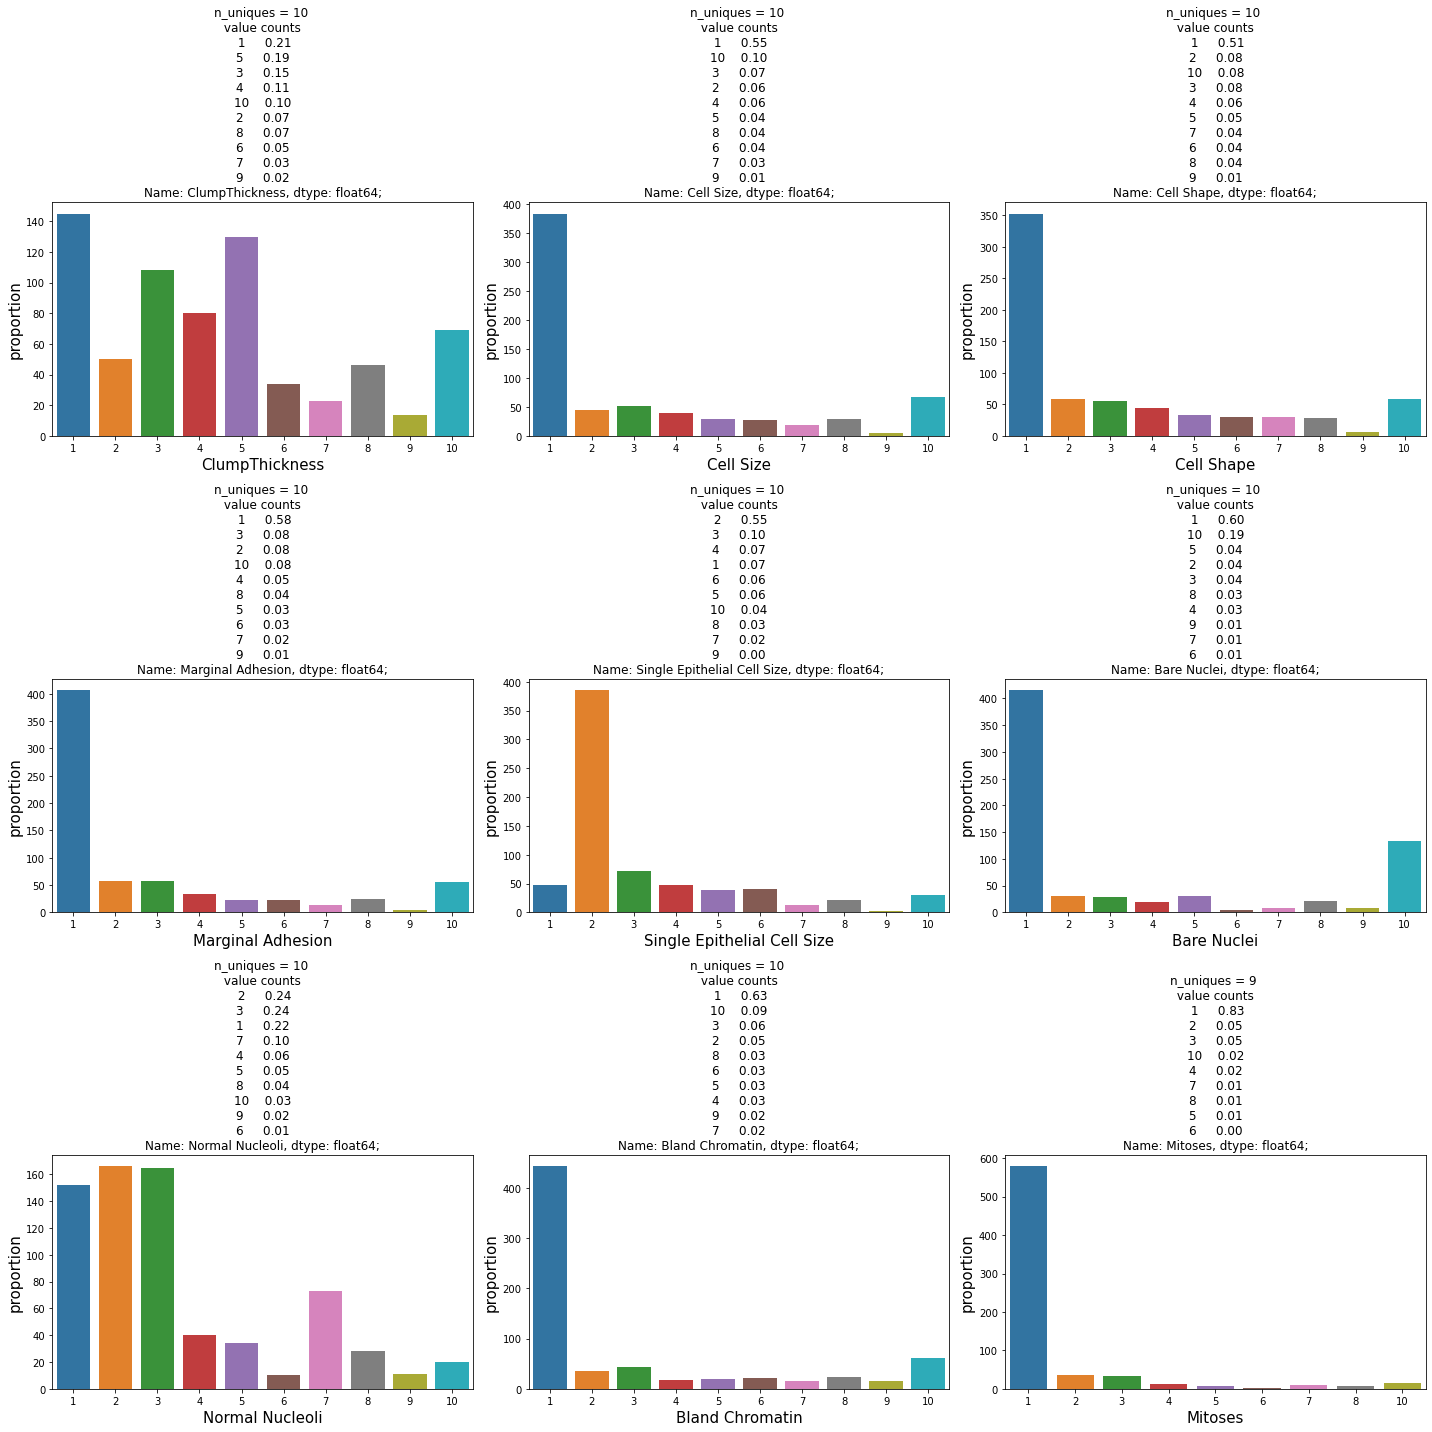

In [98]:
UVA_category(dataset, X.columns.tolist())

### Bivariate analyses

In [108]:
from scipy.stats import chi2_contingency

In [103]:
data = dataset
tar = 'Class'
cat = 'ClumpThickness'

In [110]:
x = pd.crosstab(data[tar],data[cat]).values
x

array([[142,  46,  96,  68,  85,  16,   1,   4,   0,   0],
       [  3,   4,  12,  12,  45,  18,  22,  42,  14,  69]], dtype=int64)

In [111]:
chi2_contingency(x)

(389.1946228798095,
 2.764631131754932e-78,
 9,
 array([[95.00715308, 32.76108727, 70.7639485 , 52.41773963, 85.1788269 ,
         22.27753934, 15.07010014, 30.14020029,  9.17310443, 45.21030043],
        [49.99284692, 17.23891273, 37.2360515 , 27.58226037, 44.8211731 ,
         11.72246066,  7.92989986, 15.85979971,  4.82689557, 23.78969957]]))

In [113]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    f_obs = np.array(pd.crosstab(data[tar],data[cat]).values)

    #performing chi2 test
    chi, p, dof, expected = chi2_contingency(f_obs)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    plt.rcParams["figure.figsize"] = (10, 6)    
    plt.subplots_adjust(wspace = 2)

    plt.subplot(1,2,1)
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

    plt.subplot(1,2,2)
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).round(2).unstack().fillna(0)
    ax1.plot(kind='bar', stacked='True',title=str(ax1), ax=plt.gca())
    int_level = data[cat].value_counts()

In [114]:
def plot_cat_cat(df, cat_cols, y):

    c = 1
    r = int(len(cat_cols))

    plt.rcParams["figure.autolayout"] = True
#     count = 1
    for i in range(len(cat_cols)):
        
        BVA_categorical_plot(df, y, cat_cols[i])
#         count+=1

        plt.show()

In [115]:
cols = X.columns.tolist()

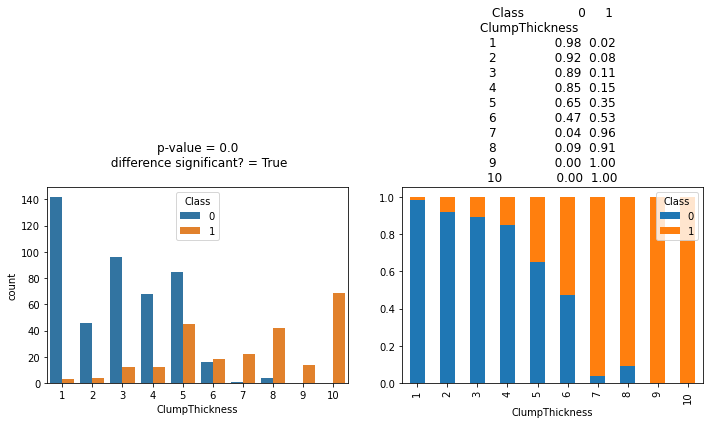

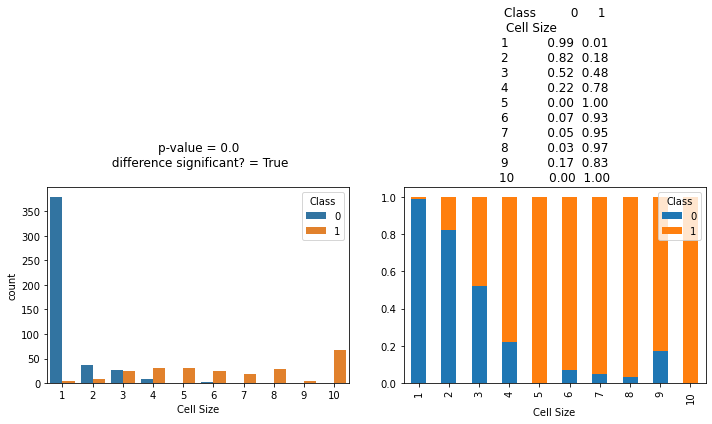

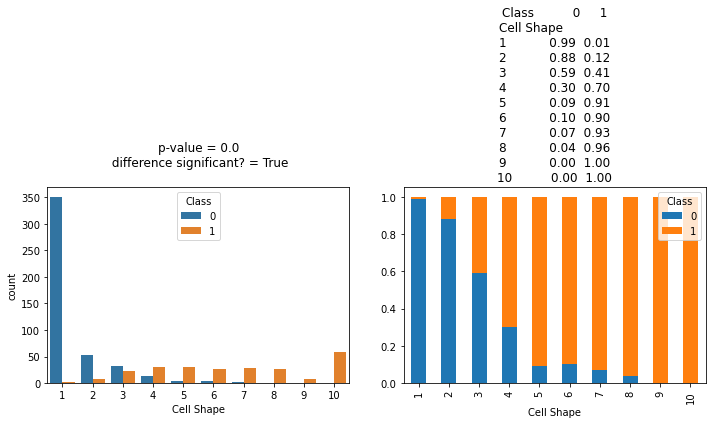

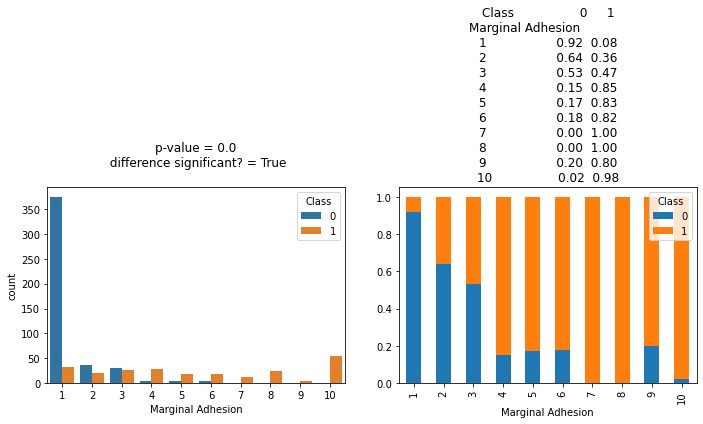

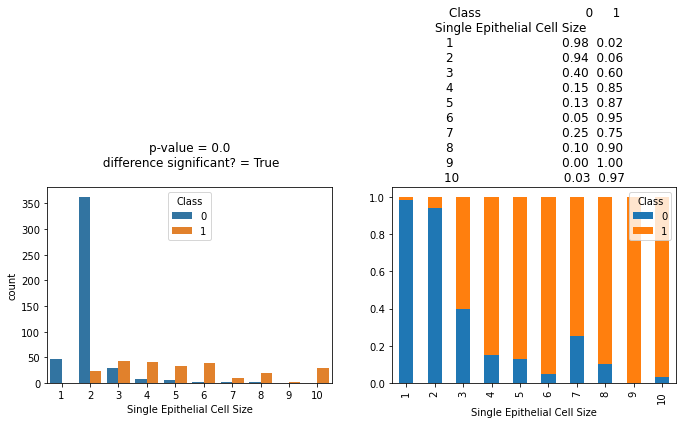

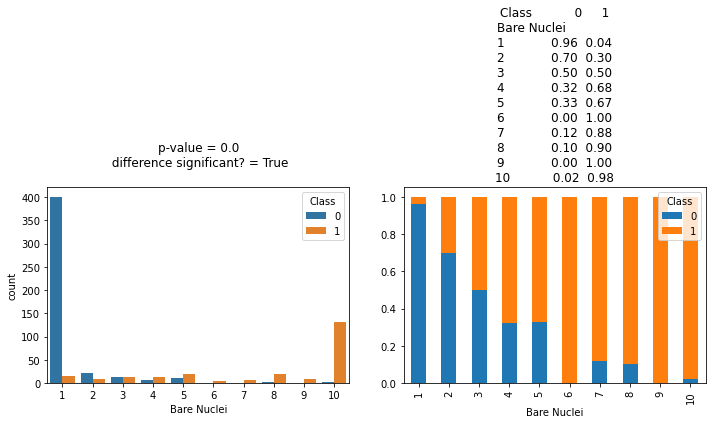

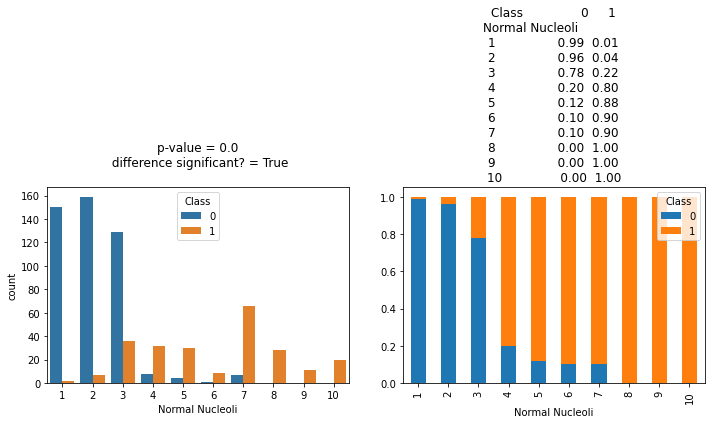

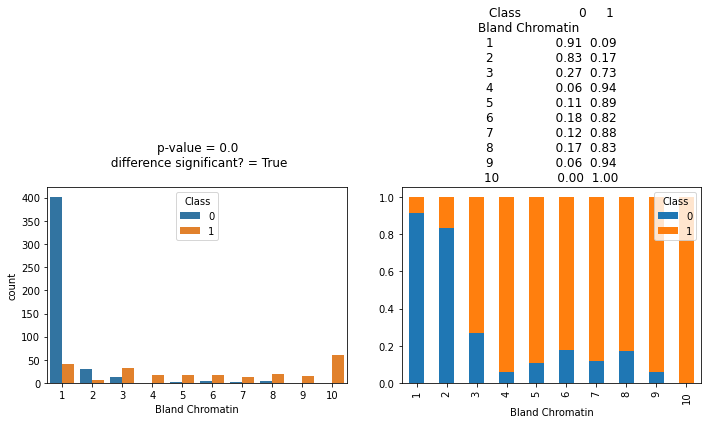

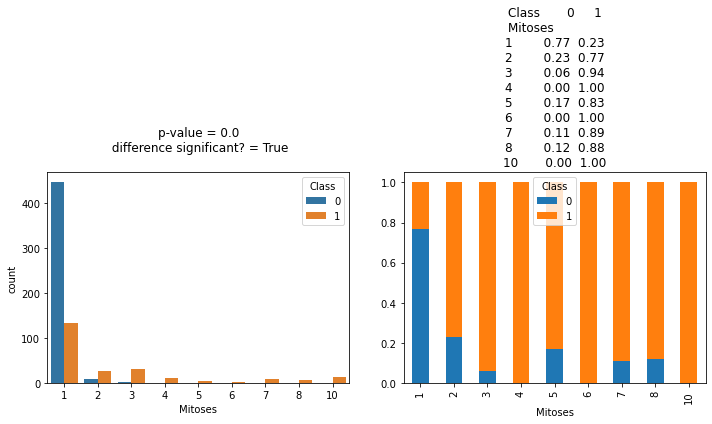

In [116]:
plot_cat_cat(dataset, cols, 'Class')

In [117]:
### - modelling !!! - later

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, classification_report,auc,plot_confusion_matrix, roc_curve, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [ ]:
logr = LogisticRegression()

In [ ]:
logr.fit(X,y)

In [ ]:
y_pred = logr.predict(X)

In [ ]:
logr.score(X,y)

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
plot_confusion_matrix(logr, X, y)

In [ ]:
def plot_roc(X, y, model):

    #define metrics
    y_pred_proba = model.predict_proba(X)[::,1]
    fpr, tpr, _ = roc_curve(y,  y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)

    #create ROC curve
    plt.figure(figsize = (7,5))
    plt.plot(fpr,tpr,label="AUC="+str(np.round(auc,3)))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

In [ ]:
plot_roc(X,y,logr)

In [ ]:
def plot_PR_curve(X,y, model):

    yhat = model.predict_proba(X)
    pos_probs = yhat[:, 1]
    # calculate the no skill line as the proportion of the positive class
#     no_skill = len(y[y==1]) / len(y)
#     # plot the no skill precision-recall curve
#     plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    precision, recall, _ = precision_recall_curve(y, pos_probs)
    auc_score = auc(recall, precision)

    # plot the model precision-recall curve
    plt.figure(figsize = (7,5))

    plt.plot(recall, precision, marker='.', label="AUC="+str(np.round(auc_score,3)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

In [ ]:
plot_PR_curve(X,y, logr)